In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avocado = pd.read_pickle('../avoplotto.pkl')
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


# 1.Visualizing Data

In [3]:
nb_sold_by_size = avocado.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

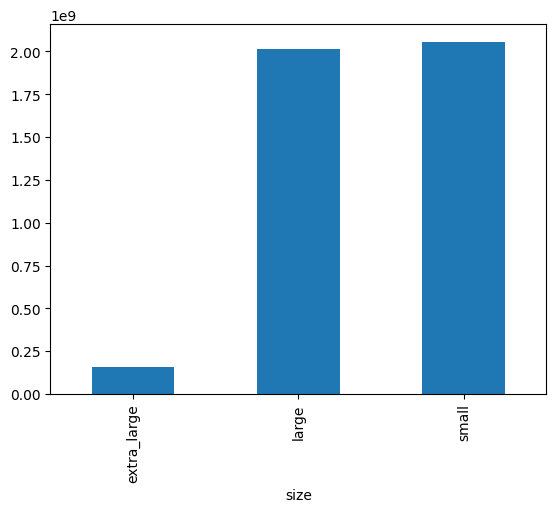

In [4]:
nb_sold_by_size.plot.bar()
plt.show()

<Axes: xlabel='date'>

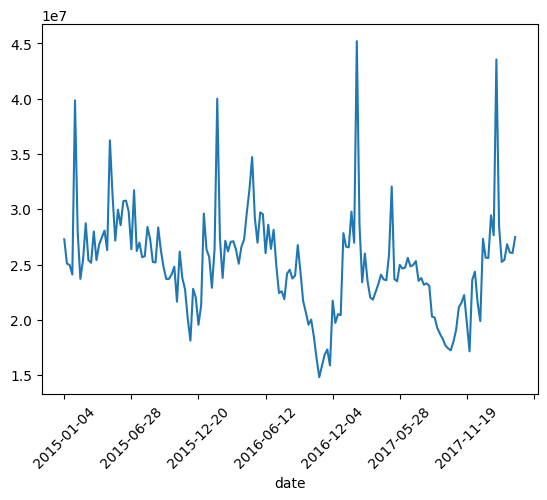

In [6]:
nb_sold_by_date = avocado.groupby('date')['nb_sold'].sum()
#nb_sold_by_date.plot.line()
nb_sold_by_date.plot(kind='line', rot = 45)


<Axes: title={'center': 'Number of avocados sold vs. average price'}, xlabel='nb_sold', ylabel='avg_price'>

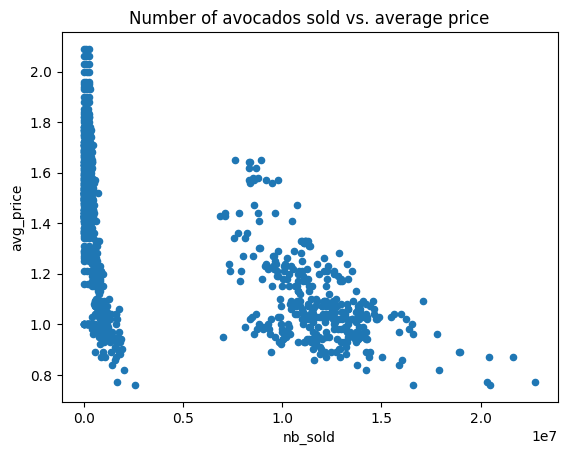

In [11]:
#plt.scatter(x='nb_sold',y='avg_price', data=avocado)
#avocado.plot(x='',y='',kind='scatter', title='')
avocado.plot.scatter(x='nb_sold',y='avg_price', title ='Number of avocados sold vs. average price')

In [12]:
avocado


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


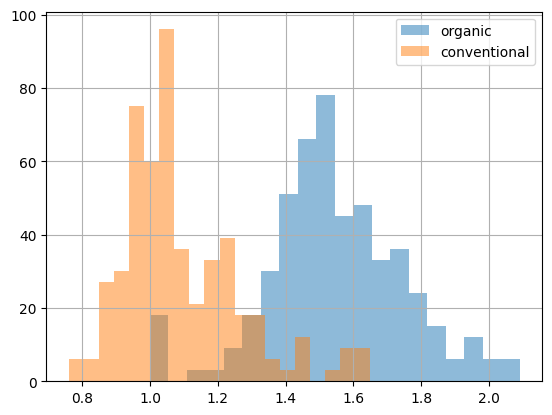

In [16]:
avocado[avocado.type == 'organic']['avg_price'].hist(alpha=0.5,bins=20)
avocado[avocado.type == 'conventional']['avg_price'].hist(alpha=0.5,bins=20)

plt.legend(['organic', 'conventional'])
plt.show()

# 2. Handling Missing Values

In [17]:
avocado

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


In [19]:
avocados_2016 = avocado[avocado.year==2016]
print(avocados_2016.isna())
print(avocados_2016.isna().any())

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


<Axes: >

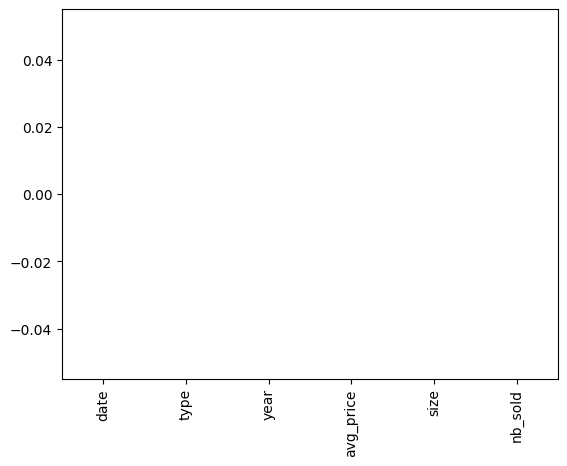

In [20]:
avocados_2016.isna().sum().plot.bar()

In [21]:
#To drop missing values
avocados_complete = avocados_2016.dropna()
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


In [23]:
#avocados_2016[cols_with_missing].hist()

# 3. Creating DataFrames

### From a List of Dictionaries (row by row)

In [24]:
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]
#This creates a dataframe where each diictionary in the list represents a row in the dataframe

avocados_2019 = pd.DataFrame(avocados_list)
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


### From a Dictionary of Lists(column by column)

In [ ]:
avocados_dict = avocados_dict = {
  "date": ['2019-11-17','2019-12-01'],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}
# This creates a Dataframe where each key in the dictionary represents a column_head and the corresponding value(list item) represents the values under the columnn

avocados_2019_2 = pd.DataFrame(avocados_dict)
avocados_2019_2

# Creating a .CSV file

df.to_csv('file_path.csv')